In [1]:
x <- c(125, 18, 20, 34)
n <- 197

In [2]:
loglikelihood_func <- function(x, theta) {
    x[1]*log(2 + theta) + (x[2] + x[3])*log(1 - theta) + x[4]*log(theta)
}

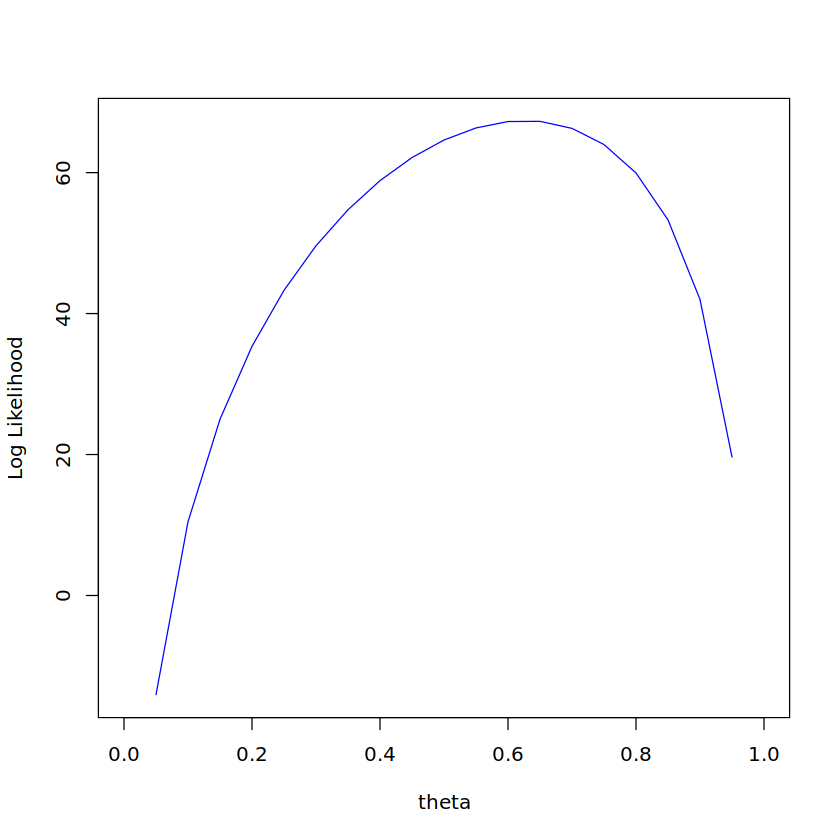

In [4]:
theta_seq <- seq(0, 1., by = 0.05)

plot(
    theta_seq,
    loglikelihood_func(x, theta_seq),
    type = "l",
    col = "blue",
    xlab = 'theta',
    ylab = 'Log Likelihood'
)

In [5]:
first_derivative <- function(x, theta) {
    x[1]/(2 + theta) - (x[2] + x[3])/(1 - theta) + x[4]/theta
}

In [6]:
second_derivative <- function(x, theta) {
    -x[1]/(2 + theta)^2 - (x[2] + x[3])/(1 - theta)^2 - x[4]/theta^2
}

In [7]:
plot_optimal_point <- function(optimal_point, plot_name) {
    plot(
        theta_seq,
        loglikelihood_func(x, theta_seq),
        type = "l",
        col = "blue",
        xlab = 'theta',
        ylab = 'Log Likelihood'
    )
    abline(v=optimal_point, col="red")
    title(main=paste(strwrap(plot_name, width=60), collapse="\n"))
}

### Newton-Raphson method

In [8]:
newton_updating <- function(x, theta, epsilon=1e-6) {
    new_theta <- theta - first_derivative(x, theta) / (second_derivative(x, theta) + epsilon)

    new_theta
}

newton_optimizer <- function(x, max_iter, threshold, theta) {
    for (i in 1:max_iter) {
        iter <- i
        old_theta <- theta
        theta <- newton_updating(x, old_theta)
        
        if (abs(theta - old_theta) <= threshold) {
            return(list(iters=iter, theta=theta))
        }
    }

    return(list(iters=iter, theta=theta))
}

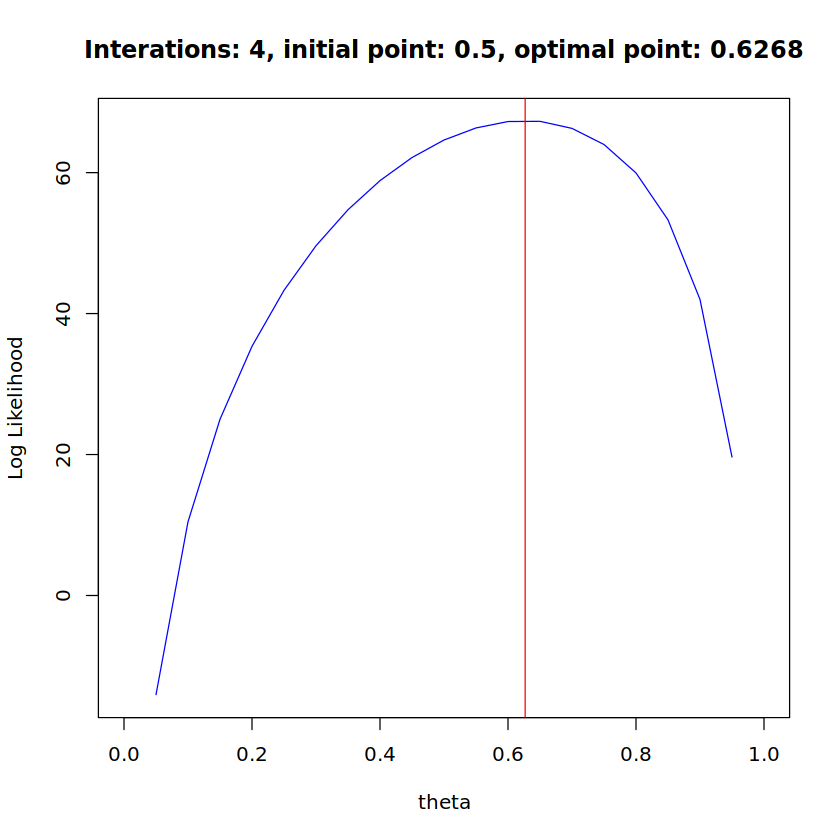

In [10]:
max_iter <- 50
threshold <- 1e-5
init_theta <- 0.5

result <- newton_optimizer(x, max_iter, threshold, init_theta)
plot_name <- sprintf("Interations: %d, initial point: %.1f, optimal point: %.4f",
                     result$iters, init_theta, result$theta)
plot_optimal_point(result$theta, plot_name)